# Online retail dataset

### RFM analysis

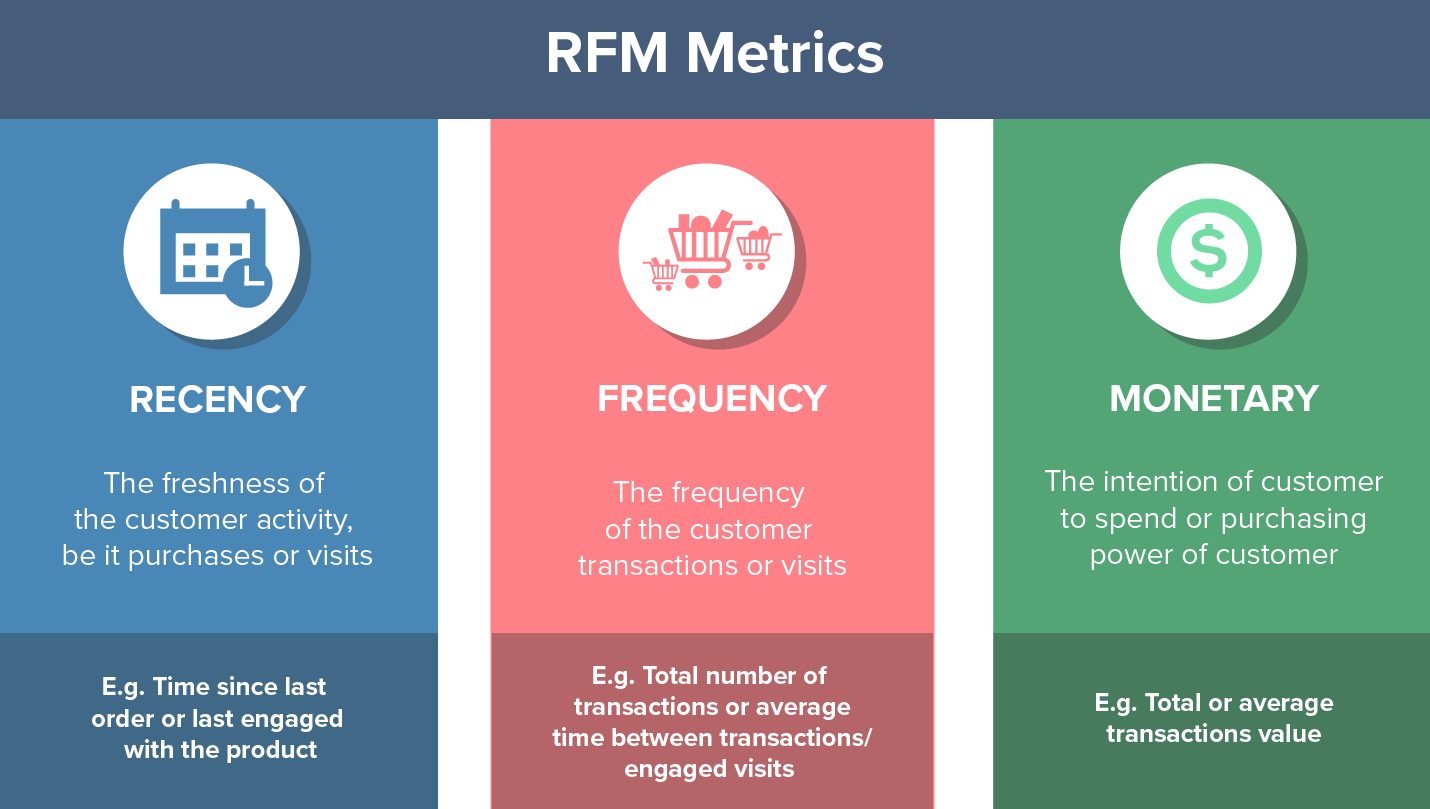

#### RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## load dataset

In [66]:
df = pd.read_excel('./Online Retail.xlsx')

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 541909 entries, 0 to 541908

Data columns (total 8 columns):

 #   Column       Non-Null Count   Dtype         

---  ------       --------------   -----         

 0   InvoiceNo    541909 non-null  object        

 1   StockCode    541909 non-null  object        

 2   Description  540455 non-null  object        

 3   Quantity     541909 non-null  int64         

 4   InvoiceDate  541909 non-null  datetime64[ns]

 5   UnitPrice    541909 non-null  float64       

 6   CustomerID   406829 non-null  float64       

 7   Country      541909 non-null  object        

dtypes: datetime64[ns](1), float64(2), int64(1), object(4)

memory usage: 33.1+ MB


In [69]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [70]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [71]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [72]:
df.duplicated().sum()

5268

## Cleaning data

In [73]:
# removing duplicate rows
df=df[~df.duplicated()]

In [74]:
df.shape

(536641, 8)

In [75]:
# removing rows where customer id= null
df = df[~df['CustomerID'].isnull()]

In [76]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Country column

In [77]:
df['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [78]:
df['Country'].value_counts(normalize=True)

United Kingdom          0.888258
Germany                 0.023605
France                  0.021103
EIRE                    0.018613
Spain                   0.006295
Netherlands             0.005904
Belgium                 0.005152
Switzerland             0.004674
Portugal                0.003663
Australia               0.003132
Norway                  0.002704
Italy                   0.001999
Channel Islands         0.001885
Finland                 0.001731
Cyprus                  0.001521
Sweden                  0.001148
Austria                 0.000998
Denmark                 0.000969
Japan                   0.000891
Poland                  0.000849
USA                     0.000725
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000570
Iceland                 0.000453
Canada                  0.000376
Greece                  0.000364
Malta                   0.000316
United Arab Emirates    0.000169
European Community      0.000152
RSA       

In [79]:
# Most of the countries equal to UK. So we put UK as one country 
df = df[df['Country'] == 'United Kingdom'].reset_index(drop = True)



In [80]:
df['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
356723    United Kingdom
356724    United Kingdom
356725    United Kingdom
356726    United Kingdom
356727    United Kingdom
Name: Country, Length: 356728, dtype: object

In [81]:
data=df.copy()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
356723,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
356724,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
356725,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
356726,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


#### Quantity column

In [82]:
data['Quantity'].min()

-80995

In [83]:
# we saw that min quantity is < 0. but this is not correct. we remove those rows
data = data[data['Quantity']>=0]

#### new column -> Amount

In [84]:
data['Amount'] = data['UnitPrice']*data['Quantity']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13884\3326596219.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Amount'] = data['UnitPrice']*data['Quantity']


#### for RFM modeling we need to we need to check and change something

#### recency

In [85]:
# recency : how much time from last transaction
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
max_time = data['InvoiceDate'].max()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13884\2583850271.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])


In [86]:
data['recency'] = max_time - data['InvoiceDate']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13884\3202370894.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['recency'] = max_time - data['InvoiceDate']


#### Montrary

In [87]:
sum_of_customer_amounts = data.groupby('CustomerID')['Amount'].sum()


In [88]:
sum_of_customer_amounts = sum_of_customer_amounts.reset_index()
sum_of_customer_amounts

,CustomerID,Amount
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2045.53


#### Frequency

In [89]:
frequency = data.groupby('CustomerID')['InvoiceNo'].count()


In [90]:
frequency=frequency.reset_index()


In [91]:
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,721


In [92]:
tbl = pd.merge(frequency,sum_of_customer_amounts, on = 'CustomerID')
tbl

,CustomerID,InvoiceNo,Amount
0,12346.0,1,77183.60
1,12747.0,103,4196.01
2,12748.0,4413,33053.19
3,12749.0,199,4090.88
4,12820.0,59,942.34
...,...,...,...
3916,18280.0,10,180.60
3917,18281.0,7,80.82
3918,18282.0,12,178.05
3919,18283.0,721,2045.53


In [93]:
tbl2 = data.groupby('CustomerID')['recency'].min()


In [94]:
tbl2 = tbl2.reset_index()

In [95]:
tbl2['recency'] = tbl2['recency'].dt.days

In [96]:
tbl2

,CustomerID,recency
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2
...,...,...
3916,18280.0,277
3917,18281.0,180
3918,18282.0,7
3919,18283.0,3


In [97]:
new_data = pd.merge(tbl2,tbl, on = 'CustomerID')
new_data


,CustomerID,recency,InvoiceNo,Amount
0,12346.0,325,1,77183.60
1,12747.0,1,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,2,59,942.34
...,...,...,...,...
3916,18280.0,277,10,180.60
3917,18281.0,180,7,80.82
3918,18282.0,7,12,178.05
3919,18283.0,3,721,2045.53


In [98]:
quarter1 = new_data['Amount'].quantile(0.05)
quarter3 = new_data['Amount'].quantile(0.95)
iqr = quarter3 - quarter1

In [99]:
new_data = new_data[(new_data['Amount'] >= quarter1 - 1.5 * iqr) &
                                    (new_data['Amount'] <= quarter3 + 1.5 * iqr) ]

In [100]:
new_data = new_data[(new_data['recency'] >= quarter1 - 1.5 * iqr) &
                                    (new_data['recency'] <= quarter3 + 1.5 * iqr) ]

In [101]:
new_data = new_data[(new_data['InvoiceNo'] >= quarter1 - 1.5 * iqr) &
                                    (new_data['InvoiceNo'] <= quarter3 + 1.5 * iqr) ]

In [102]:
scaler = StandardScaler()

In [103]:
X_scaled = pd.DataFrame(new_data)


In [104]:
scaled_X = scaler.fit_transform(X_scaled)

In [105]:
scaled_X

array([[-1.7885223 , -0.91550415,  0.18190589,  1.69206208],
       [-1.78725281, -0.89542597,  0.95044569,  1.63132924],
       [-1.74218597, -0.90546506, -0.17034152, -0.1875597 ],
       ...,
       [ 1.72478673, -0.85526962, -0.5466058 , -0.62908454],
       [ 1.72542147, -0.89542597,  5.12938085,  0.44974524],
       [ 1.72796045, -0.50390151, -0.08227967,  0.32944071]])

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, calinski_harabasz_score


In [107]:
 kmeans = KMeans(n_clusters=5, max_iter=40).fit(scaled_X)

In [108]:
    cluster_lables = kmeans.labels_


In [109]:
    silhouette_avg = silhouette_score(scaled_X, cluster_lables)


In [110]:
silhouette_avg

0.3510070503933396

In [111]:
    callins = calinski_harabasz_score(scaled_X, cluster_lables)


In [112]:
callins

1815.4420595283161